#Body Fat Analysis
Can we predict body fat percentage accurately using body measurements accessible at home and weight?

Body fat can be estimated using density and Siri's equation:

    body fat percentage = (495/Density) - 450

However, normally body density measurements are not easily accessible.
The assessment aims to predict body fat without the use of body density values.


Data was downloaded from kaggle.com
https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

The variables listed below, from left to right, are:

- Density determined from underwater weighing - Excluded as it is not easily accessible
- Percent body fat from Siri's (1956) equation - To be predicted (target)
- Age (years)
- Weight (lbs) - converted to kg for the analysis
- Height (inches) - converted to cm for the analysis
- Neck circumference (cm)
- Chest circumference (cm)
- Abdomen 2 circumference (cm)
- Hip circumference (cm)
- Thigh circumference (cm)
- Knee circumference (cm)
- Ankle circumference (cm)
- Biceps (extended) circumference (cm)
- Forearm circumference (cm)
- Wrist circumference (cm)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [253]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [254]:
bodyfat = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ML Projects/bodyfat.csv")

In [255]:
df = bodyfat.copy()

In [256]:
df = df.drop(labels='Density', axis = 1) #Density is removed

In [257]:
df['Height'] = round(df['Height']*2.54, 1)
df['Weight'] = round(df['Weight']*0.453592, 2)

##Initial Data Review

In [258]:
df.shape

(252, 14)

In [259]:
df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,69.97,172.1,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,78.58,183.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,69.85,168.3,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,83.80,183.5,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,83.57,181.0,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [260]:
df.describe()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,81.158452,178.176587,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,8.368740,12.602040,13.330783,9.305915,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,22.000000,53.750000,74.900000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,35.750000,72.117500,173.400000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,43.000000,80.060000,177.800000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,54.000000,89.360000,183.500000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,47.500000,81.000000,164.720000,197.500000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [262]:
#setting formatting for the plots
plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

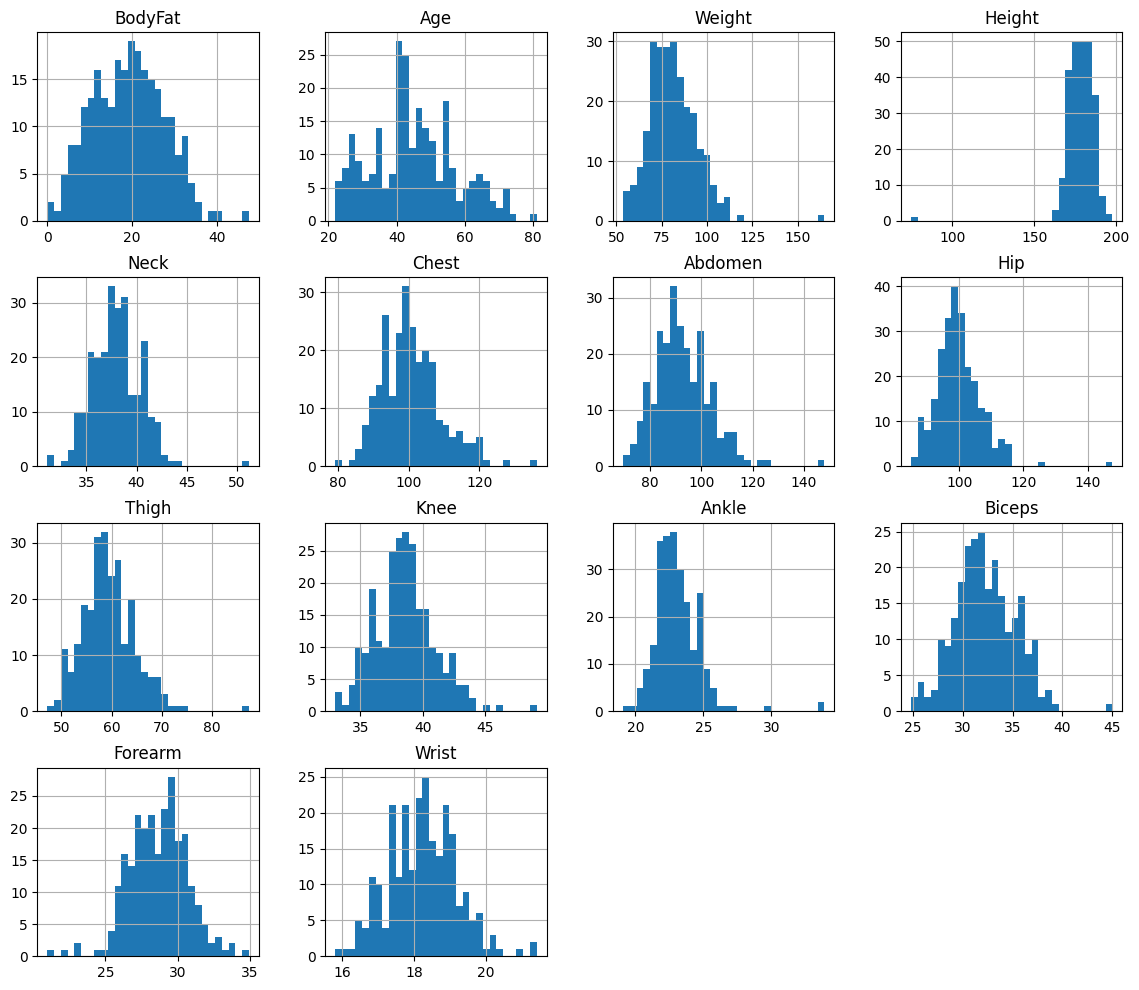

In [263]:
df.hist(bins=30, figsize=(14, 12))
plt.show()

##Creating Test Set
80-20 Train-Test ratio

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=26)

In [266]:
print(df_train.shape, df_test.shape)

(201, 14) (51, 14)


##Data Visualization and Exploratory Analysis

In [267]:
df = df_train.copy()

Body Fat Percentages based on Weight and Height

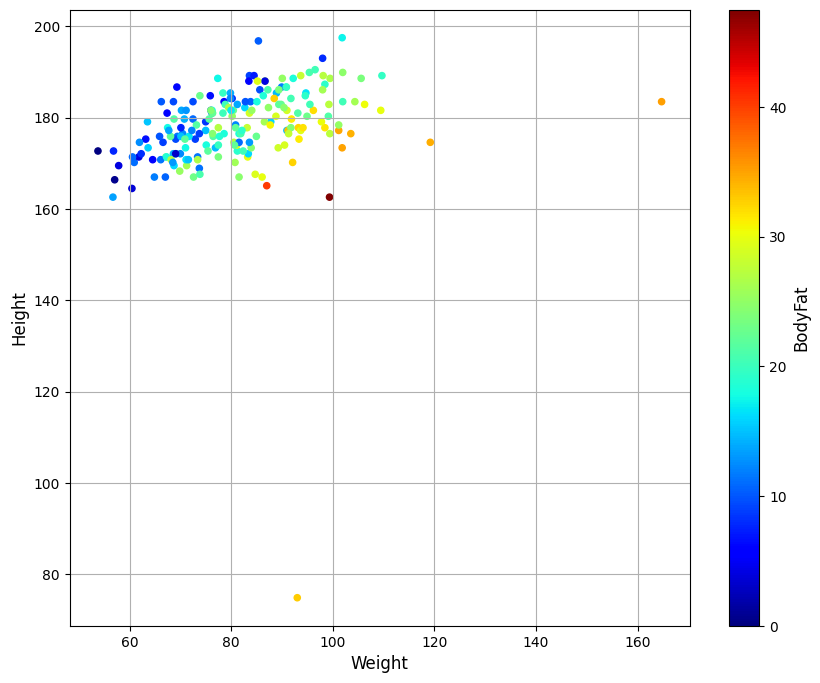

In [268]:
df.plot(kind='scatter', x='Weight', y='Height', grid='True', c='BodyFat', cmap='jet', colorbar=True, legend=True, sharex=False, figsize=(10, 8))
plt.show()

###Feature Engineering (Investigating New Features)

<Axes: >

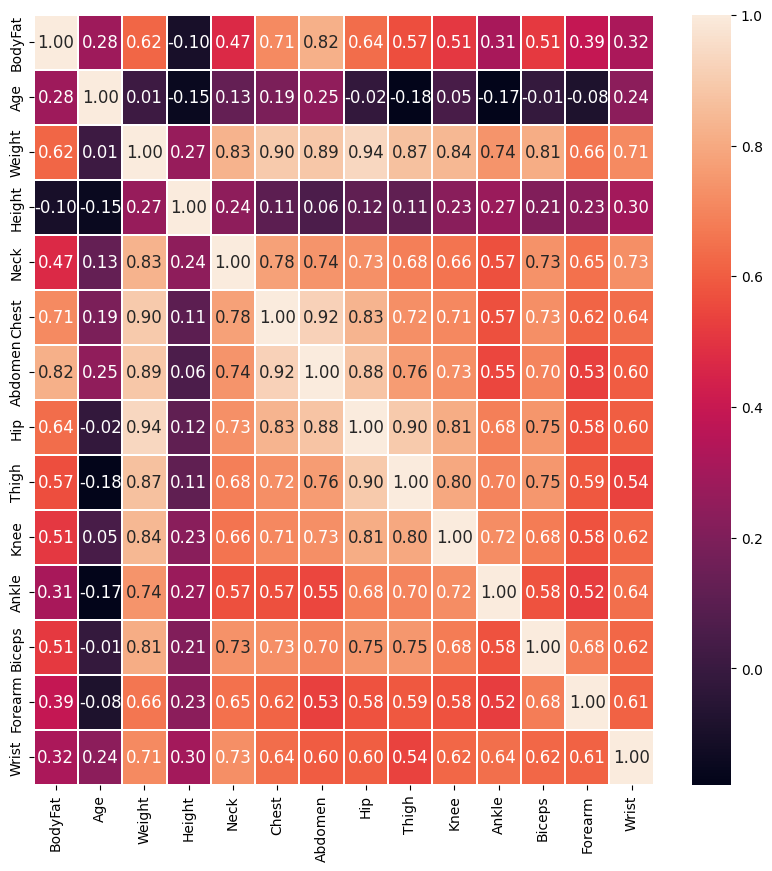

In [269]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.3,fmt="0.2f")

Some multicollinearity is observed

BMI Calculation:

- Formula: weight (kg) / (height (m) )^2

- The formula for BMI is weight in kilograms divided by height in meters squared. If height has been measured in centimeters, divide by 100 to convert this to meters.

In [270]:
#Adding New Features
df['BMI'] = df['Weight'] / pow((df['Height']/100), 2)
df['ACRatio'] = df['Abdomen'] / df['Chest']
df['AHRatio'] = df['Abdomen'] / df['Hip']
df['HTRatio'] = df['Hip'] / df['Thigh']
df.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)

In [271]:
df.head()

,BodyFat,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,BMI,ACRatio,AHRatio,HTRatio
186,23.6,41,41.9,41.3,24.7,37.2,31.8,20.0,29.679539,0.930213,1.004596,1.607090
21,15.2,28,41.3,40.6,24.6,33.0,32.8,19.9,28.965116,0.886894,0.942748,1.652997
42,31.6,48,37.3,40.9,25.0,36.7,29.8,18.4,31.136083,0.981465,0.974584,1.685377
0,12.3,23,36.2,37.3,21.9,32.0,27.4,17.1,23.623820,0.915145,0.901587,1.601695
133,26.1,50,37.8,35.6,20.5,33.6,29.3,17.3,24.785722,0.890438,0.968581,1.645276


In [272]:
corr_matrix = df.corr()

In [273]:
corr_matrix['BodyFat'].sort_values(ascending=False)

BodyFat    1.000000
AHRatio    0.774976
ACRatio    0.696087
Biceps     0.514619
Knee       0.511247
Neck       0.468893
Forearm    0.388738
BMI        0.364763
Wrist      0.320919
Ankle      0.312975
Age        0.282444
HTRatio   -0.101074
Name: BodyFat, dtype: float64

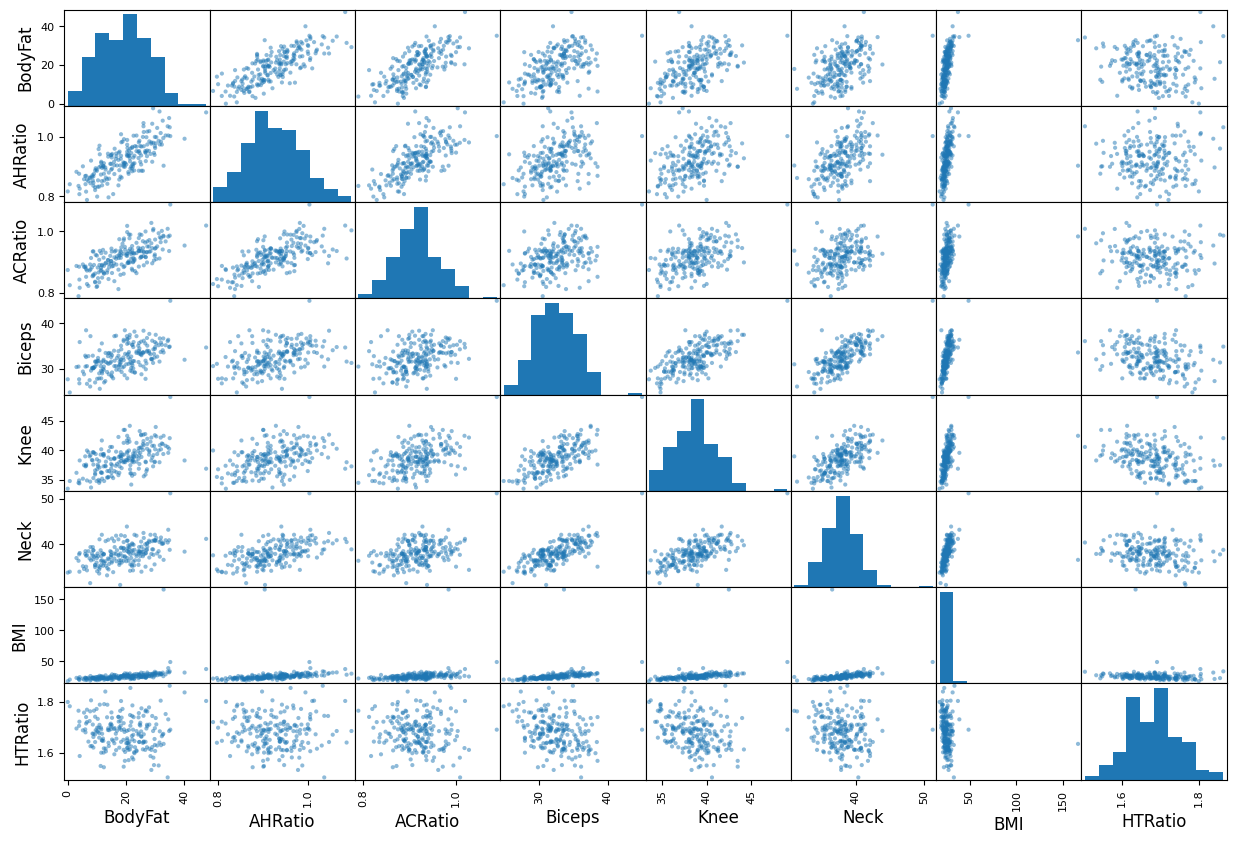

In [274]:
from pandas.plotting import scatter_matrix

attributes = ['BodyFat', 'AHRatio', 'ACRatio', 'Biceps', 'Knee', 'Neck', 'BMI', 'HTRatio']
scatter_matrix(df[attributes], figsize=(15, 10))
plt.show()

BodyFat appears to be strongly correlated with Abdomen/Hip and Abdomen/Chest ratios.

##Preping Data for Machine Learning

In [275]:
X_train = df_train.drop('BodyFat', axis=1)
y_train = df_train['BodyFat'].copy()

###Data Cleaning

####Missing Data

In [276]:
null_rows_idx = X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx].head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


No Missing Data in the current dataset. Imputer has been added to preprocessing pipeline

####Removing outliers 

In [277]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=26)
outlier_pred = isolation_forest.fit_predict(X_train)

In [278]:
outlier_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [279]:
# Outliers
X_train.iloc[outlier_pred == -1]

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
215,51,99.34,162.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
73,55,56.70,162.6,33.2,87.7,76.0,88.6,50.9,35.4,19.1,29.3,25.7,16.9
41,44,92.99,74.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
38,46,164.72,183.5,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
49,47,57.83,169.5,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8
181,40,53.75,172.7,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
247,70,60.89,170.2,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
40,45,119.18,174.6,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
44,39,56.81,172.7,31.5,85.1,76.0,88.2,50.0,34.7,21.0,26.1,23.1,16.1
221,54,104.33,183.5,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6


In [280]:
X_train.iloc[outlier_pred == -1].shape

(12, 13)

In [281]:
# Removing outliers from the training set
X_train = X_train.iloc[outlier_pred == 1]
y_train = y_train.iloc[outlier_pred == 1]

12 outliers identified and removed.

####Handling with Text and Categorical Data

There are no text / categorical data in this dataset.

####Feature Engineering

Combining colinear variables to reduce number of variables

In [282]:
from sklearn.base import BaseEstimator, TransformerMixin

class BodyRatioTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  
  def transform(self, X):
    X = X.copy()
    X['BMI'] = X['Weight'] / pow((X['Height']/100), 2)
    X['ACRatio'] = X['Abdomen'] / X['Chest']
    X['AHRatio'] = X['Abdomen'] / X['Hip']
    X['HTRatio'] = X['Hip'] / X['Thigh']
    X.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'], axis=1, inplace=True)
    self.output_columns = X.columns
    return X
  
  def get_feature_names_out(self, names=None):
    return self.output_columns

####Feature Scaling

A StandardScaler() is used in preprocessing pipeline

###Transformation Pipelines


In [283]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer

set_config(display='diagram')

In [284]:
num_pipeline = make_pipeline(BodyRatioTransformer(), SimpleImputer(strategy="median"), StandardScaler())

In [285]:
# As there is no categorical data fields this is not included in preprocessing
# from sklearn.preprocessing import OneHotEncoder

# cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

In [286]:
num_pipeline

Pipeline(steps=[('bodyratiotransformer', BodyRatioTransformer()),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [287]:
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number))
)

In [288]:
preprocessing

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('bodyratiotransformer',
                                                  BodyRatioTransformer()),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0d068ea490>)])

##Building Model Pipeline

In [289]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from scipy.stats import randint

In [290]:
model_comparison = {}

###Linear Regression

In [291]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lin_reg = Pipeline([('preprocessing', preprocessing), 
                   ('linearregression', LinearRegression())])

In [292]:
# Using Cross validation for linear model
lin_rmses = -cross_val_score(lin_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=4)
lin_r2 = cross_val_score(lin_reg, X_train, y_train, scoring="r2", cv=4)

In [293]:
pd.Series(lin_rmses).describe()

count    4.000000
mean     4.298471
std      0.222908
min      4.064133
25%      4.145541
50%      4.284562
75%      4.437491
max      4.560627
dtype: float64

In [294]:
pd.Series(lin_r2).describe()

count    4.000000
mean     0.710518
std      0.040053
min      0.676052
25%      0.679543
50%      0.702527
75%      0.733501
max      0.760964
dtype: float64

In [295]:
#Adding result for model comparison
model_comparison['lin_reg'] = (lin_rmses.mean(), lin_r2.mean())

###Ridge Regression

In [296]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_reg = Pipeline([('preprocessing', preprocessing), 
                   ('ridge', Ridge())])

In [297]:
# Using Cross validation for ridge model
ridge_rmses = -cross_val_score(ridge_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=4)
ridge_r2 = cross_val_score(ridge_reg, X_train, y_train, scoring="r2", cv=4)

In [298]:
pd.Series(ridge_rmses).describe()

count    4.000000
mean     4.295111
std      0.221888
min      4.066028
25%      4.138614
50%      4.279902
75%      4.436398
max      4.554611
dtype: float64

In [299]:
pd.Series(ridge_r2).describe()

count    4.000000
mean     0.710978
std      0.039930
min      0.675972
25%      0.680154
50%      0.703599
75%      0.734422
max      0.760741
dtype: float64

In [300]:
#Adding result for model comparison
model_comparison['ridge_reg'] = (ridge_rmses.mean(), ridge_r2.mean())

###Lasso Regression

In [301]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_reg = Pipeline([('preprocessing', preprocessing), 
                   ('lasso', Lasso())])

In [302]:
# Using Cross validation for Lasso model
lasso_rmses = -cross_val_score(lasso_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=4)
lasso_r2 = cross_val_score(lasso_reg, X_train, y_train, scoring="r2", cv=4)

In [303]:
pd.Series(lasso_rmses).describe()

count    4.000000
mean     4.647339
std      0.086986
min      4.556937
25%      4.590635
50%      4.638482
75%      4.695186
max      4.755454
dtype: float64

In [304]:
pd.Series(lasso_r2).describe()

count    4.000000
mean     0.662684
std      0.027664
min      0.633687
25%      0.648055
50%      0.658784
75%      0.673414
max      0.699480
dtype: float64

In [305]:
#Adding result for model comparison
model_comparison['lasso_reg'] = (lasso_rmses.mean(), lasso_r2.mean())

###Decision Tree

In [306]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=26))

In [307]:
# Using Cross validation for decision tree model
tree_rmses = -cross_val_score(tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=4)
tree_r2 = cross_val_score(tree_reg, X_train, y_train, scoring="r2", cv=4)

In [308]:
pd.Series(tree_rmses).describe()

count    4.000000
mean     7.389277
std      0.719196
min      6.562123
25%      7.132860
50%      7.338653
75%      7.595070
max      8.317682
dtype: float64

In [309]:
pd.Series(tree_r2).describe()

count    4.000000
mean     0.138197
std      0.207200
min     -0.159514
25%      0.092684
50%      0.197023
75%      0.242536
max      0.318255
dtype: float64

In [310]:
#Adding result for model comparison
model_comparison['tree_reg'] = (tree_rmses.mean(), tree_r2.mean())

###Random Forest Regressor

In [311]:
# RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=26))

In [312]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=26)),
])

In [313]:
param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=4,
    scoring='neg_root_mean_squared_error', random_state=26)

In [314]:
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('bodyratiotransformer',
                                                                                                BodyRatioTransformer()),
                                                                                               ('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f0d068ea490>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=26))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f0d06928f10>},
                   random_state=26, scoring='neg_root_mean_squared_error')

In [315]:
# displaying random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "split3_test_score", "mean_test_score", "rank_test_score"]]
score_cols = ["split0", "split1", "split2", "split3","mean_test_rmse"]
cv_res.columns = ["max_features"] + score_cols + ["ranking"]
cv_res[score_cols] = -cv_res[score_cols].round(decimals=6)
cv_res.head()

,max_features,split0,split1,split2,split3,mean_test_rmse,ranking
7,4,4.759671,4.916336,4.633895,4.930230,4.810033,1
6,6,4.726714,4.878593,4.685272,4.975610,4.816547,2
2,3,4.737985,5.057084,4.537623,4.966598,4.824823,3
0,8,4.867491,4.898491,4.641785,5.112096,4.879966,4
3,8,4.867491,4.898491,4.641785,5.112096,4.879966,4


In [316]:
rnd_search.best_estimator_ 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('bodyratiotransformer',
                                                                   BodyRatioTransformer()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0d0cc65cd0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=4, random_state=26))])

In [317]:
# Calculating r2 score using cross validatio and best estimator
forest_r2 = cross_val_score(rnd_search.best_estimator_ , X_train, y_train, scoring="r2", cv=4)

In [318]:
#Adding result for model comparison
model_comparison['forest_reg'] = (cv_res.loc[cv_res['ranking'] == 1]['mean_test_rmse'].values[0], forest_r2.mean())

###Model Comparison

In [319]:
model_comparison_df = pd.DataFrame(model_comparison)
model_comparison_df = model_comparison_df.transpose()
model_comparison_df.columns = ['RMSE', 'R2_Score']
model_comparison_df

,RMSE,R2_Score
lin_reg,4.298471,0.710518
ridge_reg,4.295111,0.710978
lasso_reg,4.647339,0.662684
tree_reg,7.389277,0.138197
forest_reg,4.810033,0.638038


Both linear and ridge regression performed well. Choosing ridge regression as final model as it has the lowest error overall

###Final Model

In [320]:
final_model = ridge_reg.fit(X_train, y_train)

Feature importance based on linear regression model

In [321]:
feature_importances = final_model["ridge"].coef_
sorted(zip(abs(feature_importances),
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(3.2820598353647794, 'pipeline__BMI'),
 (2.662079318910919, 'pipeline__AHRatio'),
 (1.8610832805987563, 'pipeline__ACRatio'),
 (1.6719622053829961, 'pipeline__Wrist'),
 (1.1690659039527407, 'pipeline__Neck'),
 (0.7894694273581399, 'pipeline__Biceps'),
 (0.7763835784106122, 'pipeline__Age'),
 (0.5523394824956205, 'pipeline__Forearm'),
 (0.5049315228004472, 'pipeline__Knee'),
 (0.07273135896961339, 'pipeline__HTRatio'),
 (0.05903001075375257, 'pipeline__Ankle')]

##Evaluate System on Test data

In [322]:
from sklearn.metrics import mean_squared_error
from scipy import stats

In [323]:
X_test = df_test.drop("BodyFat", axis=1)
y_test = df_test["BodyFat"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

4.379543929423817


The test RMSE is comparable to what was calculated during training.

The 95% confidence interval for the test RMSE:

In [324]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([3.61576845, 5.02862094])

#Predicting BodyFat Percentage

In [325]:
p = final_model.predict(pd.DataFrame(X_test.iloc[3].values.reshape(1,-1), columns=X_train.columns))[0]
print(f'Percent Body Fat: {p:0.2f} %\n')

Percent Body Fat: 21.35 %

